In [4]:
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from keras.models import model_from_json
# convert an array of values into a dataset matrix

In [5]:
dataframe = read_csv('inputMod.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = numpy.reshape(dataset,(1948,1))
print(dataset.shape)

(4607, 100)


In [6]:
predIndex=20

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
print(train_size)
print(test_size)
#print(dataset.shape)
train, test = dataset[0:train_size,:], dataset[train_size+predIndex:train_size+predIndex+1,:]
test = dataset[train_size+1:4606,:]
#train, test = dataset[0:train_size,:], dataset[]
print(train.shape)
print(test.shape)

3224
1383
(3224, 100)
(1381, 100)


In [9]:
train = numpy.reshape(train, (train.shape[0], 1, train.shape[1]))
test = numpy.reshape(test, (test.shape[0], 1, test.shape[1]))
print(train.shape)
print(test.shape)

(3224, 1, 100)
(1381, 1, 100)


In [10]:
dataframeY = read_csv('outputMod.csv')
datasetY = dataframeY.values
datasetY = datasetY.astype('float32')
print(datasetY.shape)

(4607, 50)


In [11]:
datasetY = scaler.fit_transform(datasetY)
print(datasetY.shape)

(4607, 50)


In [12]:
trainY, testY = datasetY[0:train_size,:], datasetY[train_size:len(datasetY),:]
testY = datasetY[train_size+predIndex:train_size+predIndex+1,:]
print(trainY.shape)
#trainY = numpy.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))
print(testY.shape)
#testY = numpy.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

(3224, 50)
(1, 50)


In [13]:
pred=[[0]*50]*5 # for 50 points and 20 forward passes

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("trainedModel.h5")
print("Loaded model from disk")

In [ ]:
print(loaded_model.layers)

In [20]:
for i in range(5):
    
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("trainedModel.h5")
    
    trainPredict = loaded_model.predict(train)
    #keras.layers.Dropout(0.2, noise_shape=None, seed=None)
    #model.add(Dense(50))
    
    model=loaded_model
    model.add(Dropout(0.2, noise_shape=None, seed=None))
    #model.add(Dense(50))
    testPredict = model.predict(test)
    #print(trainPredict)
    #print(testPredict)
    # invert predictions
    
    temptrainPredict = scaler.inverse_transform(trainPredict)
    temptrainY = scaler.inverse_transform(trainY)
    temptestPredict = scaler.inverse_transform(testPredict)
    temptestY = scaler.inverse_transform(testY)
    #trainScore = math.sqrt(mean_squared_error(temptrainY[0], temptrainPredict[0]))
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    #testScore = math.sqrt(mean_squared_error(temptestY[0], temptestPredict[0]))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[0]))
    print('Test Score: %.2f RMSE' % (testScore))

    pred[i]=temptestPredict[0]

Train Score: 0.02 RMSE
Test Score: 0.17 RMSE
Train Score: 0.02 RMSE
Test Score: 0.17 RMSE
Train Score: 0.02 RMSE
Test Score: 0.17 RMSE
Train Score: 0.02 RMSE
Test Score: 0.17 RMSE
Train Score: 0.02 RMSE
Test Score: 0.17 RMSE


In [22]:
m = numpy.mean(pred,axis=0)
st = numpy.std(pred,axis=0)
print(m)
print(st)

[71.63785  71.90429  71.892075 71.73278  72.14598  71.883255 71.950966
 72.04417  72.05689  72.29545  71.97128  72.11547  72.15263  71.732666
 72.02462  71.982666 71.94965  72.07357  72.344215 72.19872  72.44403
 72.17369  72.165596 72.509026 72.33038  72.32277  72.191505 72.27759
 72.25237  72.22617  72.373024 72.07946  72.27627  72.489    72.69805
 72.437904 72.4871   72.25875  72.52726  72.334915 72.243195 72.2205
 72.11727  71.8562   72.270454 72.158295 71.92824  72.52846  72.85785
 72.25927 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
print(testPredict)

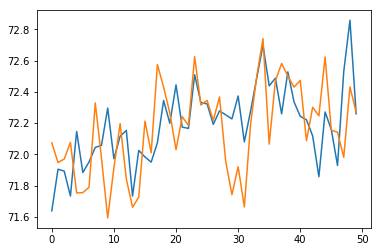

[71.63785  71.90429  71.892075 71.73278  72.14598  71.883255 71.950966
 72.04417  72.05689  72.29545  71.97128  72.11547  72.15263  71.732666
 72.02462  71.982666 71.94965  72.07357  72.344215 72.19872  72.44403
 72.17369  72.165596 72.509026 72.33038  72.32277  72.191505 72.27759
 72.25237  72.22617  72.373024 72.07946  72.27627  72.489    72.69805
 72.437904 72.4871   72.25875  72.52726  72.334915 72.243195 72.2205
 72.11727  71.8562   72.270454 72.158295 71.92824  72.52846  72.85785
 72.25927 ]
[72.07325  71.946976 71.96946  72.07616  71.75228  71.754425 71.78902
 72.32869  71.97477  71.59256  71.91277  72.19629  71.84162  71.660675
 71.72573  72.21265  72.00918  72.5738   72.43025  72.264275 72.029205
 72.24068  72.18419  72.62526  72.315315 72.34468  72.21684  72.367
 71.95438  71.74139  71.92026  71.66308  72.19201  72.50069  72.74026
 72.06481  72.47024  72.58091  72.50085  72.430244 72.47287  72.08666
 72.300964 72.245605 72.62316  72.15423  72.14134  71.98026  72.43111
 72.270

In [23]:
m = numpy.mean(pred,axis=0)
#print(m)
plt_test.plot(m)
plt_test.plot(temptestY[0])
plt_test.show()
print(m)
print(temptestY[0])
print(m.shape)

In [ ]:
st = numpy.std(pred,axis=0)
#print(st)
plt_test.plot(0,0.07,st)

plt_test.xlabel('datapoints')
plt_test.ylabel('standard deviation')
#plt_test.show()
plt_test.grid('True')
plt_test.savefig('sd1.png')
print(st)

In [ ]:
plt_test.plot(temptestY[0])
plt_test.show()
print(temptestY[0])

In [ ]:
print(temptestY[0].mean())
m.mean()

In [ ]:
modPred = testY[0]

In [ ]:
modPred=[]
if temptestY[predIndex].mean() > m.mean():
    offset = temptestY[predIndex].mean() - m.mean()
else:
    offset = -(temptestY[predIndex].mean() - m.mean())
for i in m:
    data=i+offset
    modPred.append(data)

In [ ]:
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_xlim([0,20])
#axes.set_ylim([0,10])
#plt.text(10,5.8,r'Red = Predictions, Blue = Actual Data')
plt.xlabel('datapoints')
plt.ylabel('stock value')
plt.plot(modPred,'r')
plt.plot(temptestY[0],'b')
plt_test.grid('True')
#plt_test.show()
plt.savefig('S&P5002.png')

In [ ]:

#statrting the scatternet part

a=temptestY[predIndex]
print(a)

In [ ]:

#loading modules for scatternet

from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from keras.models import model_from_json


vecs=a
print(vecs.shape)
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=4)
#print vecs_t
# Make Copies
vecs_t1 = copy.deepcopy(vecs_t)
vecs_t2 = copy.deepcopy(vecs_t)
vecs_t3 = copy.deepcopy(vecs_t)
vecs_t4 = copy.deepcopy(vecs_t)
vecs_t5 = copy.deepcopy(vecs_t)







In [ ]:
#different types of recombinations

vecs_recon = transform.inverse(vecs_t)

# Inverse with first component removed
for jj in range(len(vecs_t1.highpasses[0])):
    vecs_t1.highpasses[0][jj] = 0     

vecs_recon1 = transform.inverse(vecs_t1)

# Inverse with first and second component removed
for jj in range(len(vecs_t1.highpasses[1])):
    vecs_t1.highpasses[1][jj] = 0 

vecs_recon2 = transform.inverse(vecs_t1)

# Inverse with first, second and third component removed
for jj in range(len(vecs_t1.highpasses[2])):
    vecs_t1.highpasses[2][jj] = 0 

vecs_recon3 = transform.inverse(vecs_t1)

# Inverse with first, second, third and fourth component removed
#for jj in range(len(vecs_t1.highpasses[3])):
#    vecs_t1.highpasses[3][jj] = 0 

#vecs_recon4 = transform.inverse(vecs_t1)
vecs_recon4 = vecs_recon3
# Inverse with first, second, third, fourth and fifth component removed
#for jj in range(len(vecs_t1.highpasses[4])):
#    vecs_t1.highpasses[4][jj] = 0 

#vecs_recon5 = transform.inverse(vecs_t1)



In [ ]:
#different types of recombinations



vecs_recon = transform.inverse(vecs_t)

# Inverse with first component removed
for jj in range(len(vecs_t1.highpasses[0])):
    vecs_t1.highpasses[0][jj] = 0     

vecs_recon1 = transform.inverse(vecs_t1)

# Inverse with first and second component removed
for jj in range(len(vecs_t1.highpasses[1])):
    vecs_t1.highpasses[1][jj] = 0 

vecs_recon2 = transform.inverse(vecs_t1)

# Inverse with first, second and third component removed
for jj in range(len(vecs_t1.highpasses[2])):
    vecs_t1.highpasses[2][jj] = 0 

vecs_recon3 = transform.inverse(vecs_t1)

# Inverse with first, second, third and fourth component removed
for jj in range(len(vecs_t1.highpasses[3])):
    vecs_t1.highpasses[3][jj] = 0 

vecs_recon4 = transform.inverse(vecs_t1)

# Inverse with first, second, third, fourth and fifth component removed
#for jj in range(len(vecs_t1.highpasses[4])):
#    vecs_t1.highpasses[4][jj] = 0 

#vecs_recon5 = transform.inverse(vecs_t1)





In [ ]:
#to get plot for scatternet output only


import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_xlim([0,50])
plt.xlabel('datapoints')
plt.ylabel('stock value')
plt.plot(vecs_recon4,'g')
plt_test.grid('True')
#plt_test.show()
plt.savefig('ni4.png')

In [ ]:
#to get scatternet output and plus minus 2 sigma output

ca = vecs_recon4+2*st
cb = vecs_recon4-2*st
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_xlim([0,50])
#axes.set_ylim([0,10])
plt.text(20,71.8,r'Green = Predictions with on j[1,2,3]=0')
plt.text(15,71.7,r'Blue = minus 2*sigma, Red= plus 2*sigma')
plt.xlabel('datapoints')
plt.ylabel('stock value')
plt.plot(vecs_recon4,'g')
plt.plot(ca,'r')
plt.plot(cb,'b')
plt_test.grid('True')
#plt_test.show()
plt.savefig('nr4.png')
#print(vecs_recon)
#print(ca)